In [17]:
import numpy as np
from sympy import*
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
init_printing()

In [16]:
def dibujar_punto(punto, label, x_lim = [0, 1], y_lim=[0, 1], z_lim=[0, 1]):
  """
  Dibuja un punto en un espacio tridimensional.

  Parametros:
    punto: Un vector NumPy de tres elementos representando las coordenadas (x, y, z) del punto.
    label: Una cadena de texto para etiquetar el punto en el gráfico.
    x_lim: Una lista de dos elementos que define los límites del eje x.
    y_lim: Una lista de dos elementos que define los límites del eje y.
    z_lim: Una lista de dos elementos que define los límites del eje z.
  """

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(punto[0], punto[1], punto[2], color='b', label=label)

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title('Espacio 3D')

  ax.quiver(0, 0, 0, punto[0], punto[1], punto[2], color='b')

  ax.set_xlim(x_lim)
  ax.set_ylim(y_lim)
  ax.set_zlim(z_lim)
  ax.legend()
  plt.show()

In [19]:
## Angulo simbolico
theta = symbols("theta",  real=True)

In [20]:
## Matrix de rotación simbolica sobre le eje X
R_x = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])
R_x

⎡1    0        0   ⎤
⎢                  ⎥
⎢0  cos(θ)  -sin(θ)⎥
⎢                  ⎥
⎣0  sin(θ)  cos(θ) ⎦

In [21]:
P0 = np.array([1, 1, 0])
print(P0)

[1 1 0]


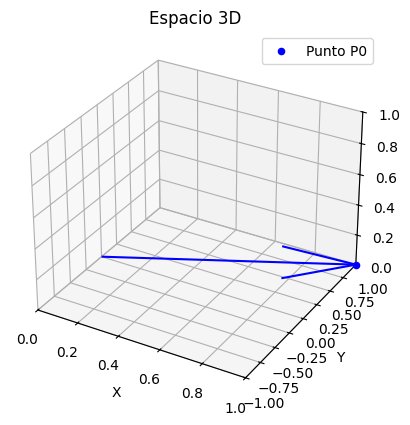

In [22]:
dibujar_punto(P0, "Punto P0", y_lim=[-1,1])

In [23]:
theta_val = np.pi #180 grados en radianes
R_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto

P0_rotado = np.dot(R_p0, P0) #Producto punto entre la matrix de rotación y el vector de posición del punto
print(P0_rotado)

[ 1.0000000e+00 -1.0000000e+00  1.2246468e-16]


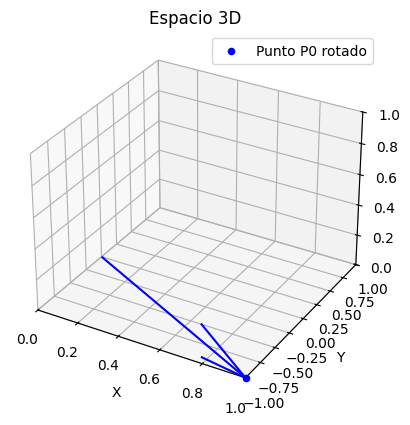

In [24]:
dibujar_punto(P0_rotado, "Punto P0 rotado", y_lim=[-1, 1])

In [25]:
theta_val = np.pi/4 # 45 grados en radianes
R_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto

P0_rotado = np.dot(R_p0, P0) #Producto punto entre la matrix de rotación y el vector de posición del punto
print(P0_rotado)

[1.         0.70710678 0.70710678]


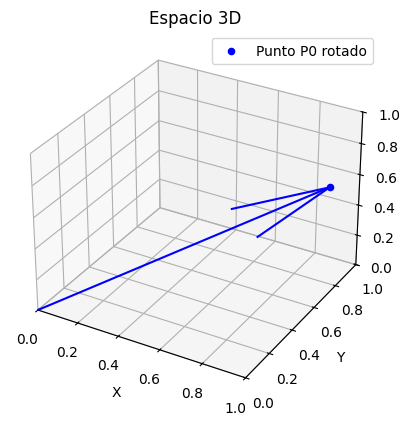

In [26]:
dibujar_punto(P0_rotado, "Punto P0 rotado", y_lim=[0, 1])

In [27]:
R_y = Matrix([[cos(theta), 0, sin(theta)], [0, 1, 0], [-sin(theta), 0, cos(theta)]])
R_y

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

In [28]:
R_z = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
R_z

⎡cos(θ)  -sin(θ)  0⎤
⎢                  ⎥
⎢sin(θ)  cos(θ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

In [29]:
from IPython.display import Image


Image(url='https://www.researchgate.net/publication/348803228/figure/fig7/AS:984434408955905@1611718861641/a-Pitch-yaw-and-roll-angles-of-an-aircraft-with-body-orientation-O-u-v-original.ppm')


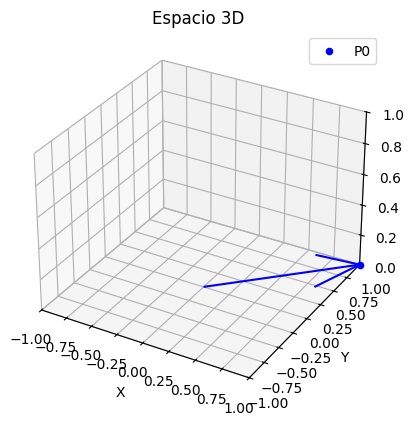

In [30]:
dibujar_punto(P0, "P0",x_lim=[-1, 1], y_lim=[-1, 1])

In [31]:
theta_val = np.pi # 180 grados en radianes
R_x_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rx
R_y_p0 = np.array(R_y.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Ry
R_z_p0 = np.array(R_z.subs({theta: theta_val})).astype(np.float64) #Se convierte theta simbolico a un valor concreto Rz

P0_rotado_x = np.dot(R_x_p0, P0) #Producto punto entre la matrix de rotación y el vector de posición del punto
P0_rotado_y = np.dot(R_y_p0, P0_rotado_x) #Producto punto entre la matrix de rotación y el vector de posición del punto
P0_rotado_z = np.dot(R_z_p0, P0_rotado_y) #Producto punto entre la matrix de rotación y el vector de posición del punto

print(P0)
print(P0_rotado_x)
print(P0_rotado_y)
print(P0_rotado_z)

[1 1 0]
[ 1.0000000e+00 -1.0000000e+00  1.2246468e-16]
[-1.0000000e+00 -1.0000000e+00 -2.4492936e-16]
[ 1.0000000e+00  1.0000000e+00 -2.4492936e-16]


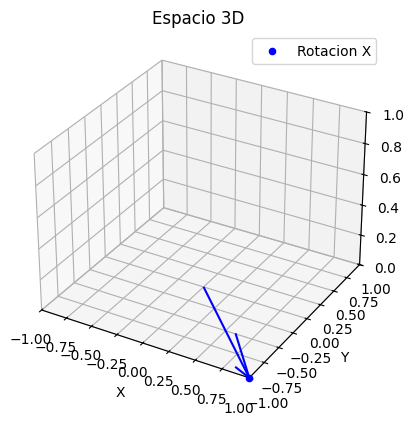

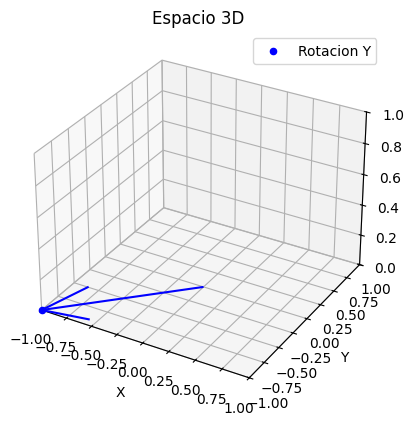

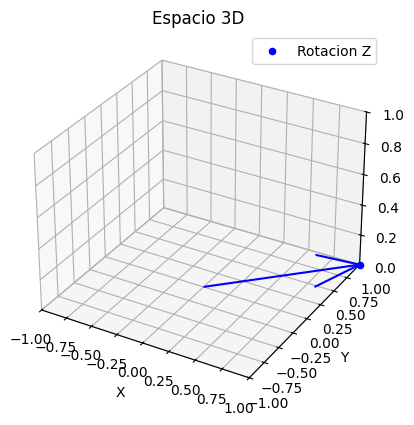

In [32]:
dibujar_punto(P0_rotado_x, label = 'Rotacion X', x_lim=[-1, 1], y_lim=[-1, 1])
dibujar_punto(P0_rotado_y, label = 'Rotacion Y', x_lim=[-1, 1], y_lim=[-1, 1])
dibujar_punto(P0_rotado_z, label = 'Rotacion Z', x_lim=[-1, 1], y_lim=[-1, 1])

GRUPO 6

--LEISER ANGARITA MELENDREZ --ELIMELEC RUIZ QUINTERO --ALDAIR SIERRA FONTALVO

In [45]:
def evaluar_orden_rotaciones(P0, R_x, R_y, R_z, theta_val):
    """
    Evaluar el efecto del orden de las rotaciones sobre un punto en el espacio.

    Parametros:
        P0: El punto a rotar.
        R_x, R_y, R_z: Las matrices de rotación sobre los ejes X, Y, Z.
        theta_val: El ángulo de rotación.
    """
    # Convertir las matrices de rotación simbólicas a matrices numéricas para un ángulo específico
    R_x_p0 = np.array(R_x.subs({theta: theta_val})).astype(np.float64)
    R_y_p0 = np.array(R_y.subs({theta: theta_val})).astype(np.float64)
    R_z_p0 = np.array(R_z.subs({theta: theta_val})).astype(np.float64)

    # Caso 1: Rotación X -> Y -> Z
    P_rotado_xyz = np.dot(R_z_p0, np.dot(R_y_p0, np.dot(R_x_p0, P0)))
    # Caso 2: Rotación Z -> Y -> X
    P_rotado_zxy = np.dot(R_x_p0, np.dot(R_y_p0, np.dot(R_z_p0, P0)))
    # Caso 3: Rotación Y -> Z -> X
    P_rotado_yzx = np.dot(R_x_p0, np.dot(R_z_p0, np.dot(R_y_p0, P0)))

    # Mostrar los resultados
    print("Rotación X -> Y -> Z:", P_rotado_xyz)
    print("Rotación Z -> Y -> X:", P_rotado_zxy)
    print("Rotación Y -> Z -> X:", P_rotado_yzx)

    # Graficar los puntos resultantes de las rotaciones
    dibujar_punto(P_rotado_xyz, label="Rotación X -> Y -> Z", x_lim=[-1, 1], y_lim=[-1, 1])
    dibujar_punto(P_rotado_zxy, label="Rotación Z -> Y -> X", x_lim=[-1, 1], y_lim=[-1, 1])
    dibujar_punto(P_rotado_yzx, label="Rotación Y -> Z -> X", x_lim=[-1, 1], y_lim=[-1, 1])


In [43]:
def traslacion(P0, vector_traslacion):
    """
    Aplica una traslación a un punto en el espacio 3D.

    Parametros:
        P0: El punto a traslar.
        vector_traslacion: El vector de traslación en formato numpy array.

    Retorna:
        El punto traslado.
    """
    P_traslado = P0 + vector_traslacion
    return P_traslado


Rotación X -> Y -> Z: [ 0.35355339  1.35355339 -0.20710678]
Rotación Z -> Y -> X: [7.85046229e-17 1.00000000e+00 1.00000000e+00]
Rotación Y -> Z -> X: [-0.20710678  1.35355339  0.35355339]


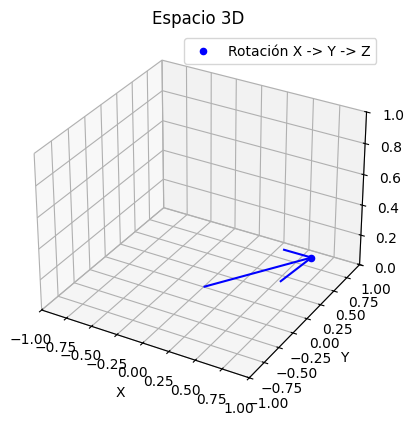

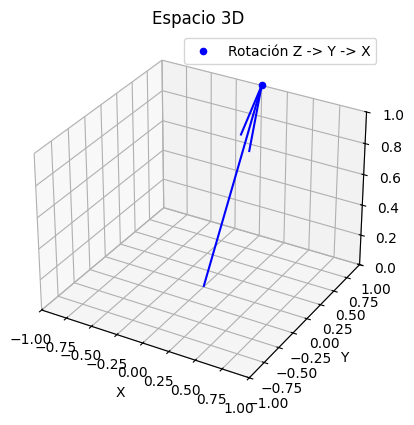

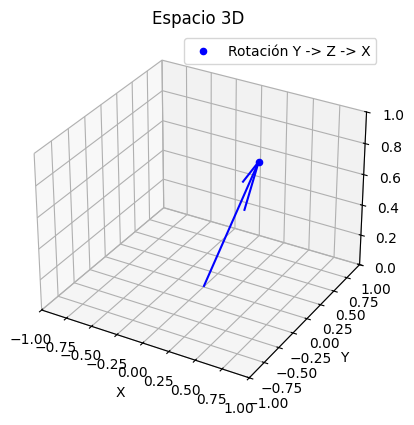

Punto traslado: [1.5 0.5 0.5]


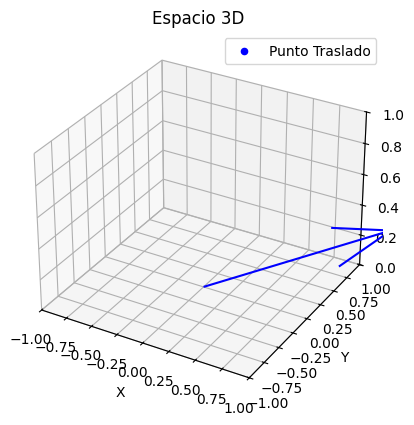

In [44]:
## EJEMPLO DE USO COMPLETO

# Punto inicial
P0 = np.array([1, 1, 0])

# Rotaciones
theta_val = np.pi / 4  # 45 grados en radianes

# Realizar las rotaciones en diferentes órdenes
evaluar_orden_rotaciones(P0, R_x, R_y, R_z, theta_val)

# Vector de traslación
vector_traslacion = np.array([0.5, -0.5, 0.5])

# Trasladar el punto
P_traslado = traslacion(P0, vector_traslacion)
print("Punto traslado:", P_traslado)

# Graficar el punto traslado
dibujar_punto(P_traslado, "Punto Traslado", x_lim=[-1, 1], y_lim=[-1, 1])


##NUESTRAS CONCLUSIONES


Cuando se realizan rotaciones sucesivas sobre los ejes
𝑥
x,
𝑦
y, y
𝑧
z, el orden en que las rotaciones se aplican afecta el resultado final. Por ejemplo:

Rotación X -> Y -> Z puede dar un resultado diferente a Rotación Z -> Y -> X.
Si bien el valor del ángulo es el mismo, el orden de las transformaciones hace que el punto rotado termine en una ubicación diferente en el espacio 3D.